In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [17]:
flights = pd.read_csv('cleaned.csv')
print(flights.shape)

(2913802, 32)


In [18]:
flights.head(20)

,Unnamed: 0,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CRS_DEP_HOUR,CRS_ARR_HOUR,MONTH_NAME,DAY_NAME,DELAYED,DELAY_REASON
0,0,2019-01-09,UA,19977,1562,FLL,EWR,1155,1151.0,-4.0,...,0.0,0.0,0.0,0.0,11,15,January,Tuesday,0,NO_DELAY
1,1,2022-11-19,DL,19790,1149,MSP,SEA,2120,2114.0,-6.0,...,0.0,0.0,0.0,0.0,21,23,November,Friday,0,NO_DELAY
2,2,2022-07-22,UA,19977,459,DEN,MSP,954,1000.0,6.0,...,0.0,0.0,0.0,0.0,9,12,July,Thursday,0,NO_DELAY
3,3,2023-03-06,DL,19790,2295,MSP,SFO,1609,1608.0,-1.0,...,0.0,24.0,0.0,0.0,16,18,March,Sunday,1,NAS
4,4,2020-02-23,NK,20416,407,MCO,DFW,1840,1838.0,-2.0,...,0.0,0.0,0.0,0.0,18,20,February,Saturday,0,NO_DELAY
5,5,2019-07-31,WN,19393,665,DAL,OKC,1010,1237.0,147.0,...,0.0,0.0,0.0,0.0,10,11,July,Tuesday,1,CARRIER
6,6,2023-06-11,AA,19805,2134,DCA,BOS,1010,1001.0,-9.0,...,0.0,0.0,0.0,0.0,10,11,June,Saturday,0,NO_DELAY
7,7,2019-07-08,YX,20452,4464,HSV,DCA,1643,1637.0,-6.0,...,0.0,23.0,0.0,0.0,16,19,July,Sunday,1,NAS
8,8,2023-02-12,NK,20416,590,IAH,LAX,530,527.0,-3.0,...,0.0,0.0,0.0,0.0,5,7,February,Saturday,0,NO_DELAY
9,9,2020-08-22,AS,19930,223,SEA,FAI,2125,2116.0,-9.0,...,0.0,0.0,0.0,0.0,21,23,August,Friday,0,NO_DELAY


In [19]:
list(flights.columns) 

['Unnamed: 0',
 'FL_DATE',
 'AIRLINE_CODE',
 'DOT_CODE',
 'FL_NUMBER',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CRS_ELAPSED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'DELAY_DUE_CARRIER',
 'DELAY_DUE_WEATHER',
 'DELAY_DUE_NAS',
 'DELAY_DUE_SECURITY',
 'DELAY_DUE_LATE_AIRCRAFT',
 'CRS_DEP_HOUR',
 'CRS_ARR_HOUR',
 'MONTH_NAME',
 'DAY_NAME',
 'DELAYED',
 'DELAY_REASON']

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913802 entries, 0 to 2913801
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   FL_DATE                  object 
 2   AIRLINE_CODE             object 
 3   DOT_CODE                 int64  
 4   FL_NUMBER                int64  
 5   ORIGIN                   object 
 6   DEST                     object 
 7   CRS_DEP_TIME             int64  
 8   DEP_TIME                 float64
 9   DEP_DELAY                float64
 10  TAXI_OUT                 float64
 11  WHEELS_OFF               float64
 12  WHEELS_ON                float64
 13  TAXI_IN                  float64
 14  CRS_ARR_TIME             int64  
 15  ARR_TIME                 float64
 16  ARR_DELAY                float64
 17  CRS_ELAPSED_TIME         float64
 18  ELAPSED_TIME             float64
 19  AIR_TIME                 float64
 20  DISTANCE                 float64
 21  DELAY_DU

In [21]:
NAs = pd.concat([flights.isnull().sum()], axis = 1, keys = ['flights'])
NAs[NAs.sum(axis=1) > 0]

,flights


In [22]:
flights = flights.dropna(subset=['ARR_DELAY'])

In [23]:
flights.head(10)

,Unnamed: 0,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CRS_DEP_HOUR,CRS_ARR_HOUR,MONTH_NAME,DAY_NAME,DELAYED,DELAY_REASON
0,0,2019-01-09,UA,19977,1562,FLL,EWR,1155,1151.0,-4.0,...,0.0,0.0,0.0,0.0,11,15,January,Tuesday,0,NO_DELAY
1,1,2022-11-19,DL,19790,1149,MSP,SEA,2120,2114.0,-6.0,...,0.0,0.0,0.0,0.0,21,23,November,Friday,0,NO_DELAY
2,2,2022-07-22,UA,19977,459,DEN,MSP,954,1000.0,6.0,...,0.0,0.0,0.0,0.0,9,12,July,Thursday,0,NO_DELAY
3,3,2023-03-06,DL,19790,2295,MSP,SFO,1609,1608.0,-1.0,...,0.0,24.0,0.0,0.0,16,18,March,Sunday,1,NAS
4,4,2020-02-23,NK,20416,407,MCO,DFW,1840,1838.0,-2.0,...,0.0,0.0,0.0,0.0,18,20,February,Saturday,0,NO_DELAY
5,5,2019-07-31,WN,19393,665,DAL,OKC,1010,1237.0,147.0,...,0.0,0.0,0.0,0.0,10,11,July,Tuesday,1,CARRIER
6,6,2023-06-11,AA,19805,2134,DCA,BOS,1010,1001.0,-9.0,...,0.0,0.0,0.0,0.0,10,11,June,Saturday,0,NO_DELAY
7,7,2019-07-08,YX,20452,4464,HSV,DCA,1643,1637.0,-6.0,...,0.0,23.0,0.0,0.0,16,19,July,Sunday,1,NAS
8,8,2023-02-12,NK,20416,590,IAH,LAX,530,527.0,-3.0,...,0.0,0.0,0.0,0.0,5,7,February,Saturday,0,NO_DELAY
9,9,2020-08-22,AS,19930,223,SEA,FAI,2125,2116.0,-9.0,...,0.0,0.0,0.0,0.0,21,23,August,Friday,0,NO_DELAY


In [24]:
print(flights.shape)


(2913802, 32)


In [25]:
flights.isnull().sum()

Unnamed: 0                 0
FL_DATE                    0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
CRS_DEP_HOUR               0
CRS_ARR_HOUR               0
MONTH_NAME                 0
DAY_NAME                   0
DELAYED                    0
DELAY_REASON               0
dtype: int64

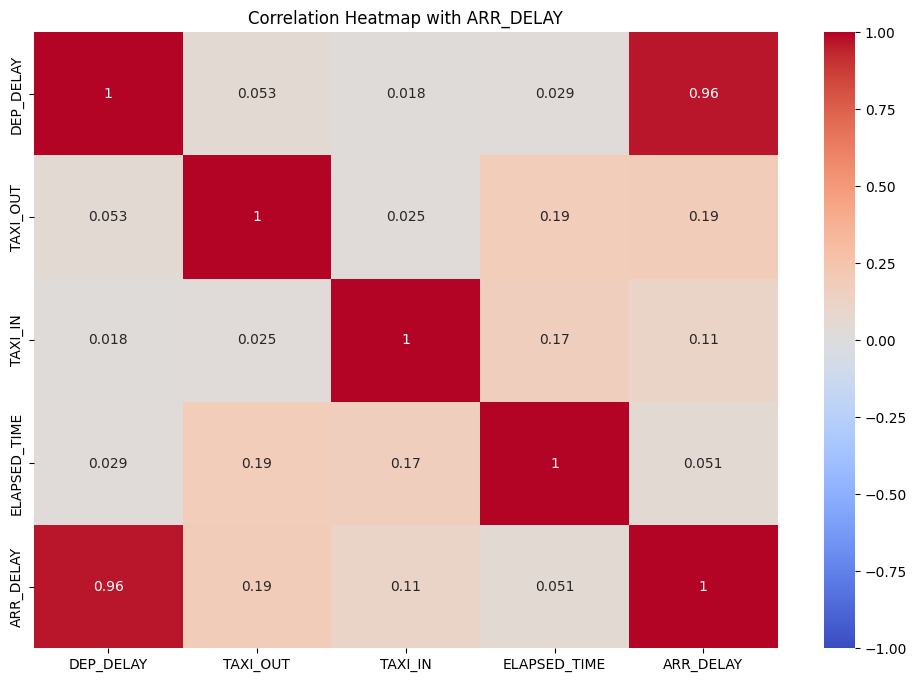

In [26]:
correlation_columns = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME' , 'ARR_DELAY']
correlation_matrix = flights[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with ARR_DELAY')
plt.show()

In [27]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913802 entries, 0 to 2913801
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   FL_DATE                  object 
 2   AIRLINE_CODE             object 
 3   DOT_CODE                 int64  
 4   FL_NUMBER                int64  
 5   ORIGIN                   object 
 6   DEST                     object 
 7   CRS_DEP_TIME             int64  
 8   DEP_TIME                 float64
 9   DEP_DELAY                float64
 10  TAXI_OUT                 float64
 11  WHEELS_OFF               float64
 12  WHEELS_ON                float64
 13  TAXI_IN                  float64
 14  CRS_ARR_TIME             int64  
 15  ARR_TIME                 float64
 16  ARR_DELAY                float64
 17  CRS_ELAPSED_TIME         float64
 18  ELAPSED_TIME             float64
 19  AIR_TIME                 float64
 20  DISTANCE                 float64
 21  DELAY_DU

In [28]:
categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME']
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [30]:
X = flights[['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']]
y = flights['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 4.9115756569513875
MSE: 41.52400154857434
RMSE: 6.443911975545161
R2: 0.9840304409466842


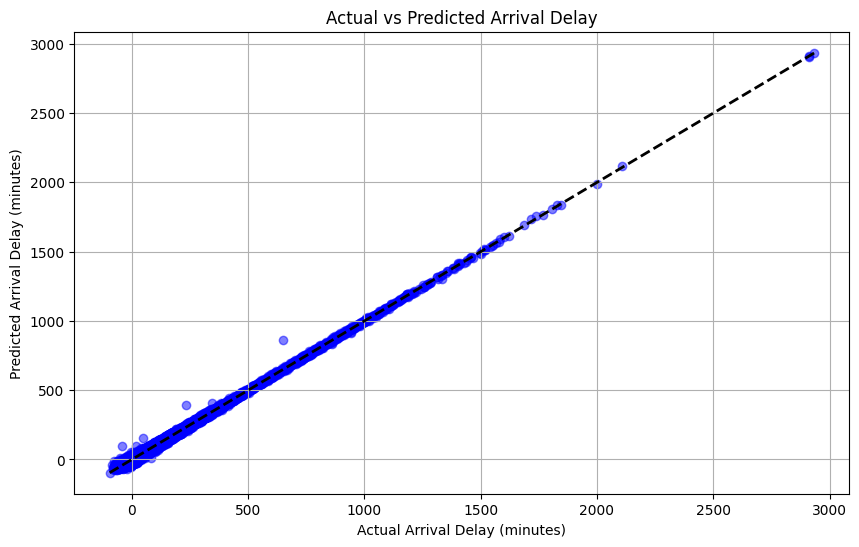

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

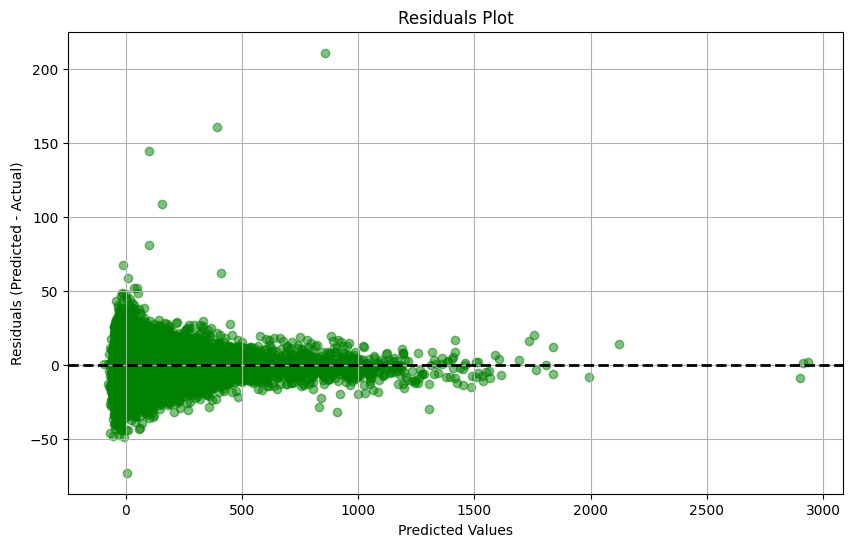

In [33]:
residuals = y_pred - y_test

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [34]:
input_data = {
    'ORIGIN': ['DAL'],
    'DEST': ['OKC'],
    'AIRLINE_CODE': ['WN'],
    'DEP_DELAY': [10.0],
    'TAXI_OUT': [15.0],
    'TAXI_IN': [141.0],
    'ELAPSED_TIME': [54.0],
    'DISTANCE': [181.0],
    'Day': [31],
    'MONTH_NAME': ['March'],
    'CRS_ARR_HOUR': [22],
    'DAY_NAME': ['Sunday'],
    'CRS_DEP_HOUR': [18]
}

input_df = pd.DataFrame(input_data)
predicted_arr_delay = pipeline.predict(input_df)

print(f'Predicted Arrival Delay: {predicted_arr_delay[0]} minutes')



Predicted Arrival Delay: 27.478986883857417 minutes


In [35]:
from scipy import sparse
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import TruncatedSVD
features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']
X = flights[features]
y = flights['ARR_DELAY']

categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME']
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

pipeline_svd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=5)),
    ('regressor', LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


pipeline_svd.fit(X_train, y_train)


y_pred = pipeline_svd.predict(X_test)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 7.585339871244766
MSE: 104.2149559371489
RMSE: 10.208572668945884
R2: 0.9599203633799561


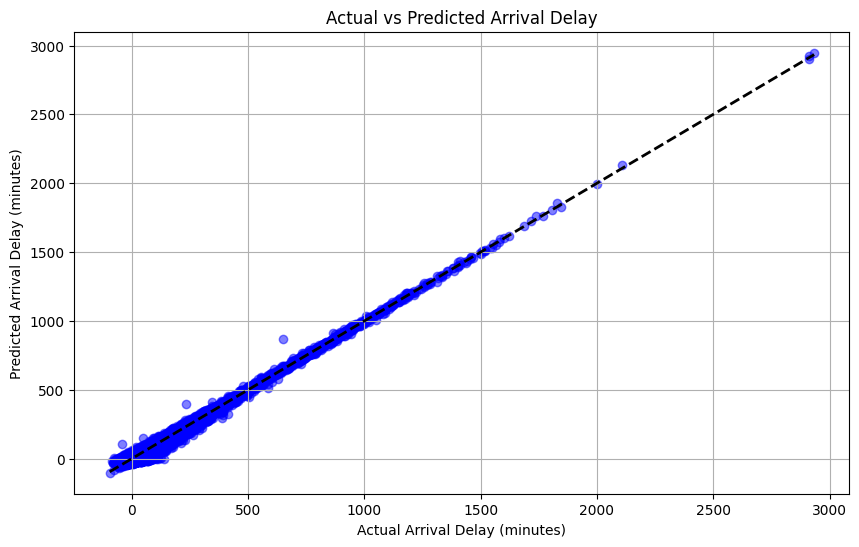

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

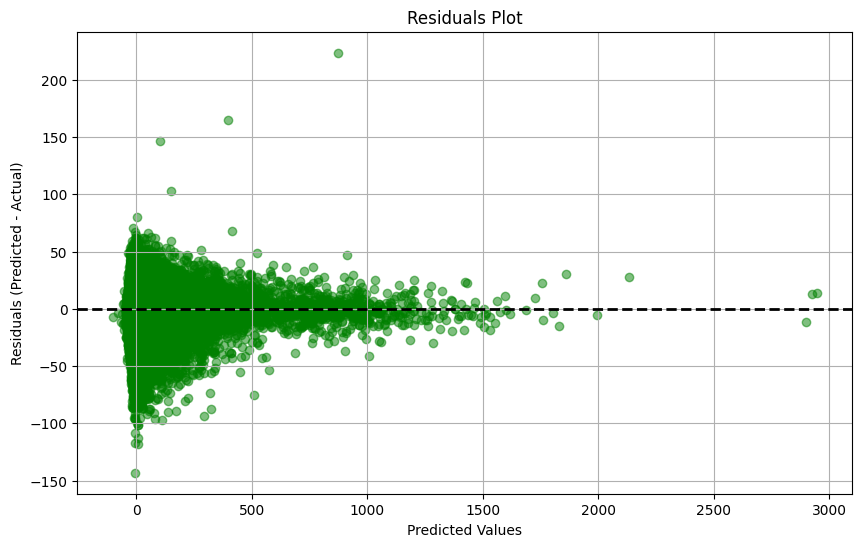

In [38]:
residuals = y_pred - y_test

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [39]:
features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']
X = flights[features]
y = flights['ARR_DELAY']
from sklearn.preprocessing import StandardScaler
categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME']
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

In [40]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(2913802, 5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 7.585339871244766
MSE: 104.2149559371489
RMSE: 10.208572668945884
R2: 0.9599203633799561


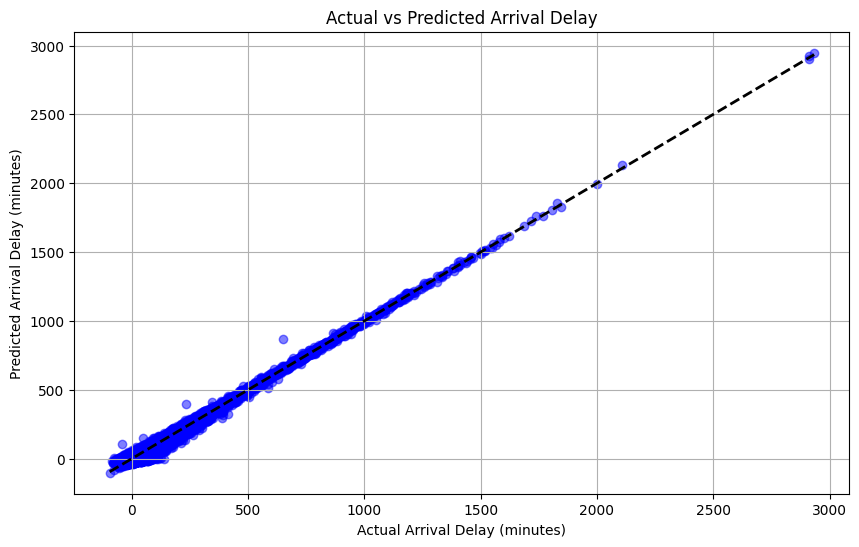

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

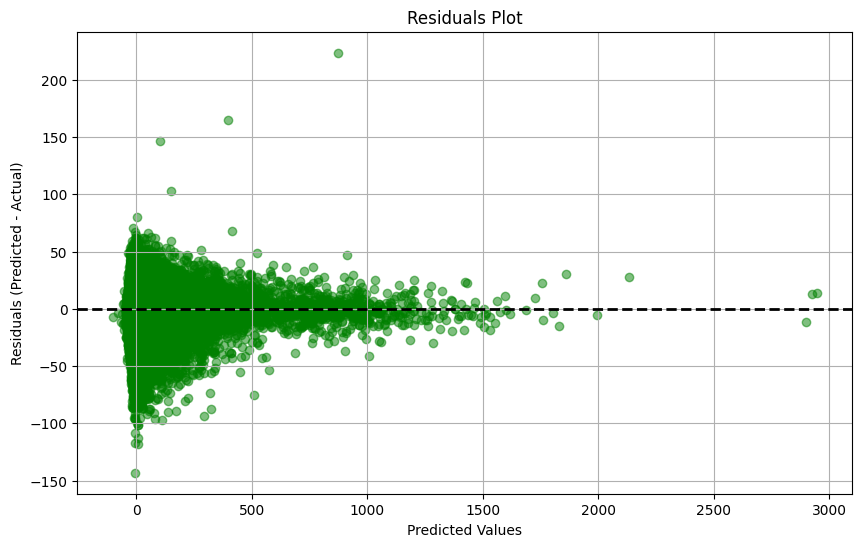

In [45]:
residuals = y_pred - y_test

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [51]:
flights['AIRLINE_CODE'] = flights['AIRLINE_CODE'].astype('category')
flights['ORIGIN'] = flights['ORIGIN'].astype('category')
flights['DEST'] = flights['DEST'].astype('category')
flights['MONTH_NAME'] = flights['MONTH_NAME'].astype('category')
flights['DAY_NAME'] = flights['DAY_NAME'].astype('category')

# Convert numerical columns to 'float32' type
flights['DEP_DELAY'] = flights['DEP_DELAY'].astype('float32')
flights['TAXI_OUT'] = flights['TAXI_OUT'].astype('float32')
flights['TAXI_IN'] = flights['TAXI_IN'].astype('float32')
flights['ELAPSED_TIME'] = flights['ELAPSED_TIME'].astype('float32')
flights['CRS_DEP_HOUR'] = flights['CRS_DEP_HOUR'].astype('float32')
flights['CRS_ARR_HOUR'] = flights['CRS_ARR_HOUR'].astype('float32')
flights['DISTANCE'] = flights['DISTANCE'].astype('float32')
flights['ARR_DELAY'] = flights['ARR_DELAY'].astype('float32')
categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME']
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

X = flights[['AIRLINE_CODE', 'ORIGIN', 'DEST', 'MONTH_NAME', 'DAY_NAME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'DISTANCE']]
y = flights['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline_knn.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AIRLINE_CODE', 'ORIGIN',
                                                   'DEST', 'MONTH_NAME',
                                                   'DAY_NAME']),
                                                 ('num', StandardScaler(),
                                                  ['DEP_DELAY', 'TAXI_OUT',
                                                   'TAXI_IN', 'ELAPSED_TIME',
                                                   'CRS_DEP_HOUR',
                                                   'CRS_ARR_HOUR',
                                                   'DISTANCE'])])),
                ('regressor', KNeighborsRegressor())])

In [55]:
X_test_sample = X_test.sample(n=5000, random_state=0)
y_test_sample = y_test[X_test_sample.index]

# Predict on the sample
y_pred_sample = pipeline_knn.predict(X_test_sample)

In [56]:
mae = mean_absolute_error(y_test_sample, y_pred_sample)
mse = mean_squared_error(y_test_sample, y_pred_sample)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_sample, y_pred_sample)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 10.36288070678711
MSE: 203.51780700683594
RMSE: 14.265966415405273
R2: 0.9105075597763062


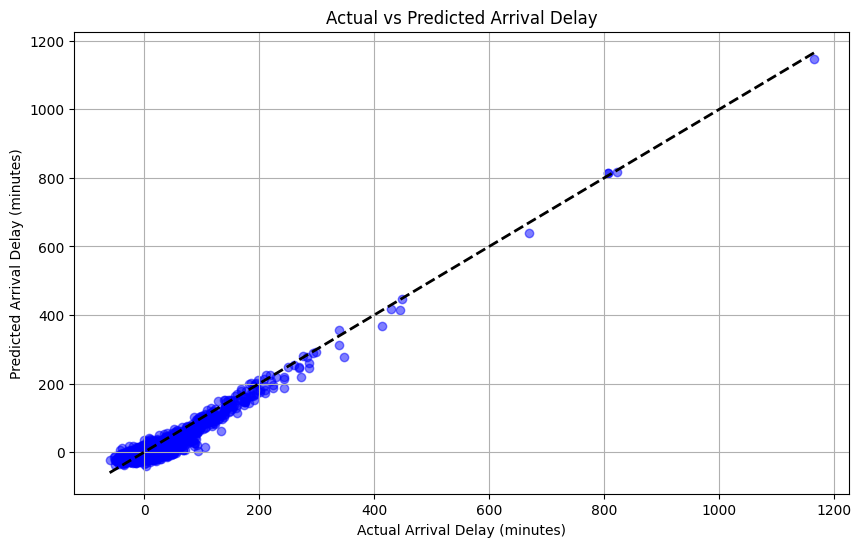

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, color='blue', alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

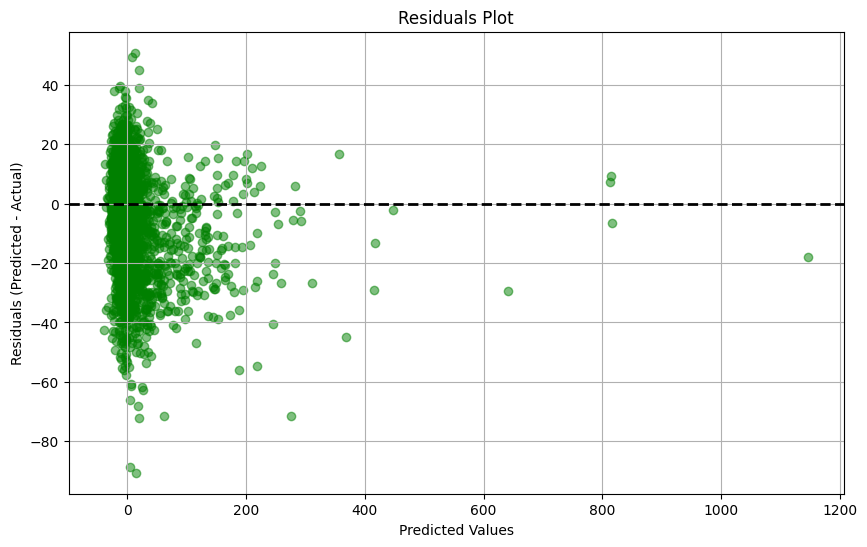

In [58]:
residuals = y_pred_sample - y_test_sample

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sample, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()